### 💾💻📊 Data Science - MMI Portfolio No. 1 
# 💥 Superhero analysis 💥

## Main goal: Use the provided datasets to answer the following questions
1. How is the male-to-female ratio of superheros (marvel + DC) and how does it change over time?
2. How does this compare between Marvel and DC superheros?
3. How does the look (hair color, eyes ...) change over time?
4. Is there a typical look of a bad superhero and of a good superhero?

## General instructions
- The final notebook should be executable in the correct order (this means it should work if you do `Kernel` --> `Restart kernel and run all cells...`)
- Just providing code and plots is not enough, you should document and comment where necessary. Not so much on small code-related things (you may still do this if you want though, but this is not required), but mostly to explain what you do, why you do it, what you observe.

More specifically:
- Please briefly comment on the changes you do to the data, in particular, if you apply complex operations or if your changes depend on a certain choice you have to make.
- Please add descriptions and/or interpretations to the results you generate (for instance tables, plots). This doesn't have to be a lot of text. For simple, easy-to-understand results, a brief sentence can be enough. For more complex results, you might want to add a bit more explanation.

---
Please add your Name here
## Name: Sander Tebeck

---

## Imports and helper function
Use this part to import the main libraries used in this notebook.  
Also add more complex helper functions to this part (if you use any).

In [3]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

# add imports if anything is missing
# feel free, for instance, to use other plotting libraries (e.g. seaborn, plotly...)

## Data import
Simple: Use this part to import your data.
For the present case you can simply use Pandas `.read_json()`.

In [4]:
path_root = "E:\Dokumente\MMI\Datascience\DataScience\superhero_data_portfolio_1" 

file_marvel = "superhero_data_marvel_mmi2024.json"
file_dc = "superhero_data_dc_mmi2024.json"

In [5]:
df_marvel = pd.read_json(os.path.join(path_root, file_marvel))
df_dc = pd.read_json(os.path.join(path_root, file_dc))

## First Exploration & Data Cleaning
Use this part to have a first look at the data.  
Apply the necessary operations to clean and harmonize the data, such as handling missing values, conversions etc.

In [6]:
df_marvel.head()

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug
0,good characters,living characters,4043.0,hazel eyes,aug-62,None,brown hair,secret identity,spider-man (peter parker),1678,male characters,\/spider-man_(peter_parker)
1,good characters,living characters,3360.0,blue eyes,mar-41,None,white hair,public identity,captain america (steven rogers),7139,male characters,\/captain_america_(steven_rogers)
2,neutral characters,living characters,3061.0,blue eyes,oct-74,None,black hair,public identity,"wolverine (james \""logan\"" howlett)",64786,male characters,\/wolverine_(james_%22logan%22_howlett)
3,good characters,living characters,2961.0,blue eyes,mar-63,None,black hair,public identity,"iron man (anthony \""tony\"" stark)",1868,male characters,\/iron_man_(anthony_%22tony%22_stark)
4,good characters,living characters,2258.0,blue eyes,nov-50,None,blond hair,no dual identity,thor (thor odinson),2460,male characters,\/thor_(thor_odinson)


In [7]:
df_dc.head()

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug
0,good characters,living characters,3093.0,blue eyes,"1939, may",None,black hair,secret identity,batman (bruce wayne),1422,male characters,\/wiki\/batman_(bruce_wayne)
1,good characters,living characters,2496.0,blue eyes,"1986, october",None,black hair,secret identity,superman (clark kent),23387,male characters,\/wiki\/superman_(clark_kent)
2,good characters,living characters,1565.0,brown eyes,"1959, october",None,brown hair,secret identity,green lantern (hal jordan),1458,male characters,\/wiki\/green_lantern_(hal_jordan)
3,good characters,living characters,1316.0,brown eyes,"1987, february",None,white hair,public identity,james gordon (new earth),1659,male characters,\/wiki\/james_gordon_(new_earth)
4,good characters,living characters,1237.0,blue eyes,"1940, april",None,black hair,secret identity,richard grayson (new earth),1576,male characters,\/wiki\/richard_grayson_(new_earth)



### Exercise 1: First overview
Here, you don't have to perform any changes. Just briefly comment on the following:
- What are missing values here and are they a problem for the task?
- Are there features in the datasets that require changes to be useful for a later analysis?

#### What are missing values here and are they a problem for the task?

##### Analyse:

In [8]:
df_marvel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16376 entries, 0 to 16375
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   align             13564 non-null  object 
 1   alive             16373 non-null  object 
 2   appearances       15280 non-null  float64
 3   eye               6609 non-null   object 
 4   first appearance  15561 non-null  object 
 5   gsm               90 non-null     object 
 6   hair              12112 non-null  object 
 7   id                12606 non-null  object 
 8   name              16376 non-null  object 
 9   page_id           16376 non-null  int64  
 10  sex               15522 non-null  object 
 11  urlslug           16376 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.6+ MB


In [9]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6896 entries, 0 to 6895
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   align             6295 non-null   object 
 1   alive             6893 non-null   object 
 2   appearances       6541 non-null   float64
 3   eye               3268 non-null   object 
 4   first appearance  6827 non-null   object 
 5   gsm               64 non-null     object 
 6   hair              4622 non-null   object 
 7   id                4883 non-null   object 
 8   name              6896 non-null   object 
 9   page_id           6896 non-null   int64  
 10  sex               6771 non-null   object 
 11  urlslug           6896 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 700.4+ KB


In [10]:
16376 /6896 

2.374709976798144

In [11]:
df_marvel.notnull().sum(axis=0)/len(df_marvel)*100

align                82.828530
alive                99.981681
appearances          93.307279
eye                  40.357841
first appearance     95.023205
gsm                   0.549585
hair                 73.961895
id                   76.978505
name                100.000000
page_id             100.000000
sex                  94.785051
urlslug             100.000000
dtype: float64

In [12]:
df_dc.notnull().sum(axis=0)/len(df_dc)*100

align                91.284803
alive                99.956497
appearances          94.852088
eye                  47.389791
first appearance     98.999420
gsm                   0.928074
hair                 67.024362
id                   70.809165
name                100.000000
page_id             100.000000
sex                  98.187355
urlslug             100.000000
dtype: float64

In [13]:
print('Unterschiede zwischen den Datensätzen:')
print(df_dc.notnull().sum(axis=0)/len(df_dc) - df_marvel.notnull().sum(axis=0)/len(df_marvel))

Unterschiede zwischen den Datensätzen:
align               0.084563
alive              -0.000252
appearances         0.015448
eye                 0.070320
first appearance    0.039762
gsm                 0.003785
hair               -0.069375
id                 -0.061693
name                0.000000
page_id             0.000000
sex                 0.034023
urlslug             0.000000
dtype: float64


Wie viele **'sex'** und **'first appearance'** Einträge sind komplett?

In [14]:
print('DC: ')
print(df_dc[['sex', 'first appearance']].notnull().all(axis=1).sum())
print(df_dc[['sex', 'first appearance']].notnull().all(axis=1).sum()/len(df_dc))
print('Marvel: ')
print(df_marvel[['sex', 'first appearance']].notnull().all(axis=1).sum())
print(df_marvel[['sex', 'first appearance']].notnull().all(axis=1).sum()/len(df_marvel))

DC: 
6703
0.9720127610208816
Marvel: 
14766
0.901685393258427


Wie viele der Aussehensdaten sind zusammen in einem Eintrag?:

In [15]:
print('DC: ')
print(df_dc[['sex', 'eye', 'hair']].notnull().all(axis=1).sum())
print(df_dc[['sex', 'eye', 'hair']].notnull().all(axis=1).sum()/len(df_dc))
print('Marvel: ')
print(df_marvel[['sex', 'eye', 'hair']].notnull().all(axis=1).sum())
print(df_marvel[['sex', 'eye', 'hair']].notnull().all(axis=1).sum()/len(df_marvel))

DC: 
2731
0.39602668213457076
Marvel: 
6161
0.3762212994626282


Da wir das aussehen im bezug zur Zeit betrachten wollen: 

In [16]:
print('DC: ')
print(df_dc[['eye', 'hair', 'first appearance', 'sex']].notnull().all(axis=1).sum())
print(df_dc[[ 'eye', 'hair', 'first appearance', 'sex']].notnull().all(axis=1).sum()/len(df_dc))
print('Marvel: ')
print(df_marvel[['eye', 'hair', 'first appearance', 'sex']].notnull().all(axis=1).sum())
print(df_marvel[['eye', 'hair', 'first appearance', 'sex']].notnull().all(axis=1).sum()/len(df_marvel))

DC: 
2718
0.3941415313225058
Marvel: 
5801
0.35423790913532


In [17]:
print('DC: ')
print(df_dc[['hair', 'first appearance', 'sex']].notnull().all(axis=1).sum())
print(df_dc[['hair', 'first appearance', 'sex']].notnull().all(axis=1).sum()/len(df_dc))
print('Marvel: ')
print(df_marvel[['hair', 'first appearance', 'sex']].notnull().all(axis=1).sum())
print(df_marvel[['hair', 'first appearance', 'sex']].notnull().all(axis=1).sum()/len(df_marvel))

DC: 
4571
0.6628480278422274
Marvel: 
11268
0.6880801172447484


In [18]:
print('DC: ')
print(df_dc[['eye', 'first appearance', 'sex']].notnull().all(axis=1).sum())
print(df_dc[['eye', 'first appearance', 'sex']].notnull().all(axis=1).sum()/len(df_dc))
print('Marvel: ')
print(df_marvel[['eye', 'first appearance', 'sex']].notnull().all(axis=1).sum())
print(df_marvel[['eye', 'first appearance', 'sex']].notnull().all(axis=1).sum()/len(df_marvel))

DC: 
3231
0.4685324825986079
Marvel: 
6068
0.3705422569614069


In [19]:
print('DC: ')
print(df_dc[['first appearance', 'sex']].notnull().all(axis=1).sum())
print(df_dc[['first appearance', 'sex']].notnull().all(axis=1).sum()/len(df_dc))
print('Marvel: ')
print(df_marvel[['first appearance', 'sex']].notnull().all(axis=1).sum())
print(df_marvel[['first appearance', 'sex']].notnull().all(axis=1).sum()/len(df_marvel))

DC: 
6703
0.9720127610208816
Marvel: 
14766
0.901685393258427


Schließlich müssen wir das Aussehen mit **'align'** betrachten

In [20]:
print('DC: ')
print(df_dc[['align','sex', 'eye', 'hair']].notnull().all(axis=1).sum())
print(df_dc[['align','sex', 'eye', 'hair']].notnull().all(axis=1).sum()/len(df_dc))
print('Marvel: ')
print(df_marvel[['align','sex', 'eye', 'hair']].notnull().all(axis=1).sum())
print(df_marvel[['align','sex', 'eye', 'hair']].notnull().all(axis=1).sum()/len(df_marvel))

DC: 
2527
0.3664443155452436
Marvel: 
5412
0.33048363458720076


In [21]:
print(df_marvel['sex'].value_counts())
print(df_dc['sex'].value_counts())

sex
male characters           11638
female characters          3837
agender characters           45
genderfluid characters        2
Name: count, dtype: int64
sex
male characters           4783
female characters         1967
genderless characters       20
transgender characters       1
Name: count, dtype: int64


In [22]:
print(df_marvel['eye'].value_counts())
print(df_dc['eye'].value_counts())

eye
blue eyes          1962
brown eyes         1924
green eyes          613
black eyes          555
red eyes            508
white eyes          400
yellow eyes         256
grey eyes            95
hazel eyes           76
variable eyes        49
purple eyes          31
orange eyes          25
one eye              21
pink eyes            21
gold eyes            14
silver eyes          12
violet eyes          11
amber eyes           10
no eyes               7
multiple eyes         7
yellow eyeballs       6
black eyeballs        3
magenta eyes          2
compound eyes         1
Name: count, dtype: int64
eye
blue eyes             1102
brown eyes             879
black eyes             412
green eyes             291
red eyes               208
white eyes             116
yellow eyes             86
photocellular eyes      48
grey eyes               40
hazel eyes              23
purple eyes             14
violet eyes             12
orange eyes             10
gold eyes                9
auburn hair 

In [23]:
df_dc[(df_dc['eye'] == 'auburn hair')].head(7)

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug
872,good characters,living characters,32.0,auburn hair,"1984, april",None,None,public identity,marcia king (new earth),80676,female characters,\/wiki\/marcia_king_(new_earth)
1776,neutral characters,living characters,14.0,auburn hair,"1989, april",None,None,public identity,"anthony angelo, jr. (new earth)",146812,male characters,"\/wiki\/anthony_angelo,_jr._(new_earth)"
3600,good characters,living characters,5.0,auburn hair,"1998, april",None,None,None,tawna (new earth),114487,female characters,\/wiki\/tawna_(new_earth)
3623,bad characters,living characters,5.0,auburn hair,"1995, august",None,None,secret identity,razerkut (new earth),192614,female characters,\/wiki\/razerkut_(new_earth)
3627,bad characters,living characters,5.0,auburn hair,"1994, november",None,None,public identity,carla draper (new earth),130938,female characters,\/wiki\/carla_draper_(new_earth)
4070,neutral characters,deceased characters,4.0,auburn hair,"1995, april",None,None,None,madolyn corbett (new earth),71092,female characters,\/wiki\/madolyn_corbett_(new_earth)
5346,None,living characters,2.0,auburn hair,"1988, holiday",None,None,public identity,sally milton (new earth),4935,female characters,\/wiki\/sally_milton_(new_earth)


In [24]:
print(df_marvel['hair'].value_counts())
print(df_dc['hair'].value_counts())

hair
black hair               3755
brown hair               2339
blond hair               1582
no hair                  1176
bald                      838
white hair                754
red hair                  620
grey hair                 531
green hair                117
auburn hair                78
blue hair                  56
strawberry blond hair      47
purple hair                47
orange hair                43
variable hair              32
pink hair                  31
yellow hair                20
silver hair                16
gold hair                   8
reddish blond hair          6
light brown hair            6
magenta hair                5
orange-brown hair           3
bronze hair                 1
dyed hair                   1
Name: count, dtype: int64
hair
black hair               1574
brown hair               1148
blond hair                744
red hair                  461
white hair                346
grey hair                 157
green hair                 42
blue

In [25]:
print(df_marvel['align'].value_counts())
print(df_dc['align'].value_counts())

align
bad characters        6720
good characters       4636
neutral characters    2208
Name: count, dtype: int64
align
bad characters        2895
good characters       2832
neutral characters     565
reformed criminals       3
Name: count, dtype: int64


##### Antwort:

Beide datensätze haben sehr wenig **'gsm'** Einträge **( 9%(dc) 5% (marvel))**, mäßige Anzahl an Einträge bei der **'eye'** **(47%(dc) 40%(marvel))**, und relativ gute mengen an **'hair'** und **'id'** **(~70%(dc) ~74%(marvel))**. 

**'align'** ist bei **dc (91%)** besser befüllt als bei **marvel(81%)**. 
Allerdings ist der marvel Datensatz ~2.3 mal größer.

Von diesen Spalten die unter 90% Einträge haben intressieren uns zum beantworten der Leitfragen besonders folgende: **'aling'**, **'eye'**, und **'hair'**. Dise Spalten sind essenziell für die Letzen beiden Leitfragen. Bei beiden datensätzen sind **~34%** dieser in einer Zeile vollständig, d.h. wir haben bei **dc 2530** komplette Aussehenseintärge und bei **marvel 5529**. Fast alle dieser Einträge haben auch ein **'first appearance'** Eintrag.

#### Are there features in the datasets that require changes to be useful for a later analysis?

**'first appearance'**

Da uns in unserer Analyse die veränderung über die Zeit in zwei Fragen interessiert und diese in der spalte **'first appearance'** als string mit dem Monat gespeichert ist, sollte diese spalte transformiert. Entweder man gibt die Datum und Monateinzeln als Zahlen aus oder man rechnet Jahreszal + Monat/12 als Float zusammen. Da wir an der allgemeinen Entwicklung über einen großen zeitraum hinweg interessiert sind, lohnt sich dieser mehraufwand nicht. Die Datensätz unterscheiden sich in der formatierung der **'first appearance'** und müssen deswegen unterschidelich umgeformt werden.

**'name'**

**'name'** hat in beiden datensätzen zwei informationen enthalten. Zuerst der Heldenname(wenn vorhanden) und dann kommt der Richtige Name oder Spitzname wenn es einen Heldennamen gab. Diese spalte könte auch umgeformt werden. Dies Umformung halte ich jedoch für eine mit geringer priotitä, da wir keine der leitfragen damit unterstützen. 

**'sex'**

**'sex'** hat auch einträge für agender und genderfluide Charaktere. Je nach Analysemethode müssen wir das im Hinterkopf behalten.

**'eye'**

Das DC Datenset enthält in der Spalte **'eye'** 7 fehlerhafte Einträge, welche die **'hair'** farbe statt **'eye'** farbe beschreiben. Dies wurde durch kurze recherche der charaktere bestätigt. Da es sich nur um 7 datenpunkte handelt ist es allerdings kein Großes Problem. 

## Exercise 2: Handle missing values

If you think this is necessary for the next steps in your analysis, use this part to remove (or impute/replace/edit) missing values.

Für die Ersten beiden fragen muss der Datensatz auf die kompletten Einträge von **'sex'** und **'first appearance'** reduziert werden. Der Datenverlust ist gering und eine ausfüllen der Daten durch z.B. einen durchschnittswert Sinnlos.

In [26]:
dc_data_1 = df_dc.dropna(subset=['sex', 'first appearance'])
marvel_data_1 = df_marvel.dropna(subset=['sex', 'first appearance'])

Beim Zeitlichen verhalten des Aussehens gibt es gößere Probleme. Die **'eye'** Einträge sind sehr Lückenhaft und wenn wir auf alle Datenpunkte verzichten würden die keine kompletten Einträge wüürden wir den Datensatz um ~70% verkleinern. Falls zum beispiel viele fühere Charaktere nicht alle einträge haben könnte das unsere beobachtungen stark verzerren. Da uns fast leere Datenpunkte aber auch keinen Mehrwert bieten, bietet es sich an nur die Daten zu entfernen wo:
- Keine **'first Appearance'** enthalten ist
- Kein Eintrag in einem der Primären Aussehensspalten (**'hair', 'eye'**) ist.

In [27]:
dc_data_2 = df_dc.dropna(subset=['first appearance'])
dc_data_2 = dc_data_2.dropna(subset=['hair', 'eye'], how='all')
marvel_data_2 = df_marvel.dropna(subset=['first appearance'])
marvel_data_2 = marvel_data_2.dropna(subset=['hair', 'eye'], how='all')

Um die Grage nach einen Typischen look zu beantworten können wir den Datensatz etwas stärker kürzen, da die Aussage *"der Typische bösewicht hat keine Angegebene Augen und Haarfarbe"* Sinnlos ist.

In [310]:
dc_data_3 = df_dc.dropna(subset=['align', 'hair', 'eye', 'sex'], how='any')
marvel_data_3 = df_marvel.dropna(subset=['align', 'hair', 'eye', 'sex'],how='any')

## Exercise 3: Data conversions
Several columns contain data in a non-ideal format or style.
Apply the following changes:

- `first appearance` --> convert to consistent date format
- add column with only the year of appearance (call the new column: `year`)
- Convert the `name` column into a better, more consistent format. Try to add a proper `superhero_name` and a `real_name` column. So: `"batman (bruce wayne)"` should be split into `"batman"` and `"bruce wayne"`. Don't worry if this won't work for all cases, you are not expected to do (and check) this manually. Simply try to find a good solution that works most of the time.

### Hint:
Sometimes there is no proper Pandas function to do what you need (or we simply are not sure or can't find the right one...).
If you want to do a more complex operation on all entries in a column you can work with the `.apply()` method from Pandas. This fill any given Python function to all elements in a dataframe or column.

```python
def my_special_operation(input_entry):
    # do what you want
    return ouput_entry

# Apply this to ALL entries
my_dataframe.apply(my_special_operation)


# Apply this to all entries in one column
my_dataframe.loc[:, "column_A"].apply(my_special_operation)
```

#### Dates to Year

**TODO: Conversions**

In [29]:
def convert_date_dc(input_entry):
    output_entry = str.split(input_entry, ', ')[0]
    return int(output_entry)

In [30]:
def convert_date_marvel(input_entry):
    output_entry = int(str.split(input_entry, '-')[1])
    if output_entry > 30:
        output_entry += 1900
    else:
        output_entry += 2000
    return int(output_entry)

In [31]:
dc_data_1['year'] = dc_data_1.loc[:, 'first appearance'].apply(convert_date_dc)  
dc_data_2['year'] = dc_data_2.loc[:, 'first appearance'].apply(convert_date_dc)

C:\Users\sundl\AppData\Local\Temp\ipykernel_14076\2075222903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_data_1['year'] = dc_data_1.loc[:, 'first appearance'].apply(convert_date_dc)


In [32]:
marvel_data_1['year'] = marvel_data_1.loc[:, 'first appearance'].apply(convert_date_marvel)  
marvel_data_2['year'] = marvel_data_2.loc[:, 'first appearance'].apply(convert_date_marvel)

C:\Users\sundl\AppData\Local\Temp\ipykernel_14076\2870177759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marvel_data_1['year'] = marvel_data_1.loc[:, 'first appearance'].apply(convert_date_marvel)


In [33]:
marvel_data_1.head()

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug,year
0,good characters,living characters,4043.0,hazel eyes,aug-62,None,brown hair,secret identity,spider-man (peter parker),1678,male characters,\/spider-man_(peter_parker),1962
1,good characters,living characters,3360.0,blue eyes,mar-41,None,white hair,public identity,captain america (steven rogers),7139,male characters,\/captain_america_(steven_rogers),1941
2,neutral characters,living characters,3061.0,blue eyes,oct-74,None,black hair,public identity,"wolverine (james \""logan\"" howlett)",64786,male characters,\/wolverine_(james_%22logan%22_howlett),1974
3,good characters,living characters,2961.0,blue eyes,mar-63,None,black hair,public identity,"iron man (anthony \""tony\"" stark)",1868,male characters,\/iron_man_(anthony_%22tony%22_stark),1963
4,good characters,living characters,2258.0,blue eyes,nov-50,None,blond hair,no dual identity,thor (thor odinson),2460,male characters,\/thor_(thor_odinson),1950


In [34]:
dc_data_1.head()

,align,alive,appearances,eye,first appearance,gsm,hair,id,name,page_id,sex,urlslug,year
0,good characters,living characters,3093.0,blue eyes,"1939, may",None,black hair,secret identity,batman (bruce wayne),1422,male characters,\/wiki\/batman_(bruce_wayne),1939
1,good characters,living characters,2496.0,blue eyes,"1986, october",None,black hair,secret identity,superman (clark kent),23387,male characters,\/wiki\/superman_(clark_kent),1986
2,good characters,living characters,1565.0,brown eyes,"1959, october",None,brown hair,secret identity,green lantern (hal jordan),1458,male characters,\/wiki\/green_lantern_(hal_jordan),1959
3,good characters,living characters,1316.0,brown eyes,"1987, february",None,white hair,public identity,james gordon (new earth),1659,male characters,\/wiki\/james_gordon_(new_earth),1987
4,good characters,living characters,1237.0,blue eyes,"1940, april",None,black hair,secret identity,richard grayson (new earth),1576,male characters,\/wiki\/richard_grayson_(new_earth),1940


#### Names

In [35]:
def split_name_first_entry(input_entry):
    output_entry = str.split(input_entry, '(')
    return output_entry[0]

def split_name_second_entry(input_entry):
    output_entry = str.split(input_entry, '(')
    if len(output_entry)<2:
        return ''
    output_entry = str.replace(output_entry[1], ')','')
    return output_entry

In [36]:
marvel_data_1['superhero_name'] = marvel_data_1.loc[:, 'name'].apply(split_name_first_entry)
marvel_data_1['real_name'] = marvel_data_1.loc[:, 'name'].apply(split_name_second_entry)
marvel_data_2['superhero_name'] = marvel_data_2.loc[:, 'name'].apply(split_name_first_entry)
marvel_data_2['real_name'] = marvel_data_2.loc[:, 'name'].apply(split_name_second_entry,)
marvel_data_3['superhero_name'] = marvel_data_2.loc[:, 'name'].apply(split_name_first_entry)
marvel_data_3['real_name'] = marvel_data_2.loc[:, 'name'].apply(split_name_second_entry)

dc_data_1['superhero_name'] = dc_data_1.loc[:, 'name'].apply(split_name_first_entry)
dc_data_1['real_name'] = dc_data_1.loc[:, 'name'].apply(split_name_second_entry)  
dc_data_2['superhero_name'] = dc_data_2.loc[:, 'name'].apply(split_name_first_entry)
dc_data_2['real_name'] = dc_data_2.loc[:, 'name'].apply(split_name_second_entry)
dc_data_3['superhero_name'] = dc_data_2.loc[:, 'name'].apply(split_name_first_entry)
dc_data_3['real_name'] = dc_data_2.loc[:, 'name'].apply(split_name_second_entry)

C:\Users\sundl\AppData\Local\Temp\ipykernel_14076\2679662558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marvel_data_1['superhero_name'] = marvel_data_1.loc[:, 'name'].apply(split_name_first_entry)
C:\Users\sundl\AppData\Local\Temp\ipykernel_14076\2679662558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marvel_data_1['real_name'] = marvel_data_1.loc[:, 'name'].apply(split_name_second_entry)
C:\Users\sundl\AppData\Local\Temp\ipykernel_14076\2679662558.py:5: SettingWithCopyWarning: 
A value is t

In [37]:
marvel_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14766 entries, 0 to 16175
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   align             12301 non-null  object 
 1   alive             14766 non-null  object 
 2   appearances       13954 non-null  float64
 3   eye               6068 non-null   object 
 4   first appearance  14766 non-null  object 
 5   gsm               85 non-null     object 
 6   hair              11268 non-null  object 
 7   id                11587 non-null  object 
 8   name              14766 non-null  object 
 9   page_id           14766 non-null  int64  
 10  sex               14766 non-null  object 
 11  urlslug           14766 non-null  object 
 12  year              14766 non-null  int64  
 13  superhero_name    14766 non-null  object 
 14  real_name         14766 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.8+ MB


## Data analysis 1 
Here you should address the two main questions posed at the beginning:
1. How is the male-to-female ratio of superheros (marvel + DC) and how does it change over time?
2. How does this compare between Marvel and DC superheros?

### Exercise 4:
- Please show the appearance of new superheros over time.
- Compare the same for only "male" and "female" superheros. 
- Perform this analysis for `Marvel`, `DC` and both `Marvel_DC`.

Hints: 
- For such a comparison it is often helpful to plot the **ratio** between the two (male:female or female:male).
- When you are interested in trends over time, you are often free to decide how you handle the "time"-component. You can use data for every year, or combine several years etc.
- Optional "nice-to-have": for noisy temporal data it sometimes helps (visually) to also use a **moving average** to smoothen curves.

#### Please show the appearance of new superheros over time.

In [38]:
data_1 = pd.concat([marvel_data_1,dc_data_1])

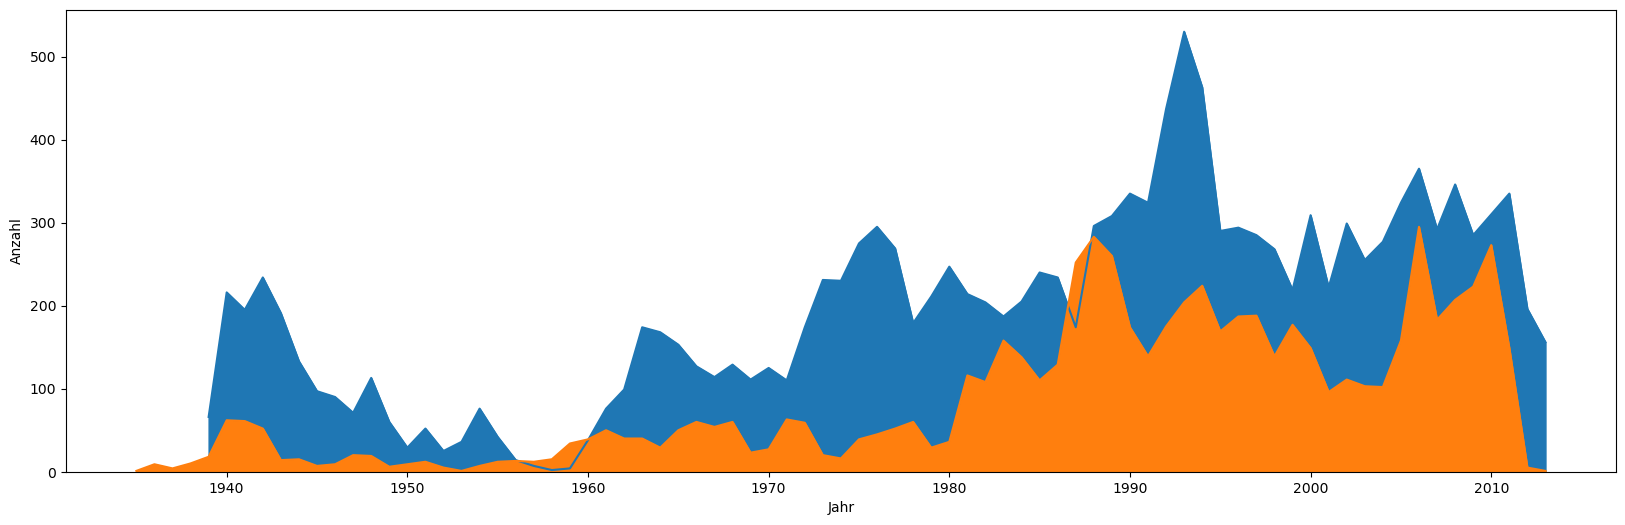

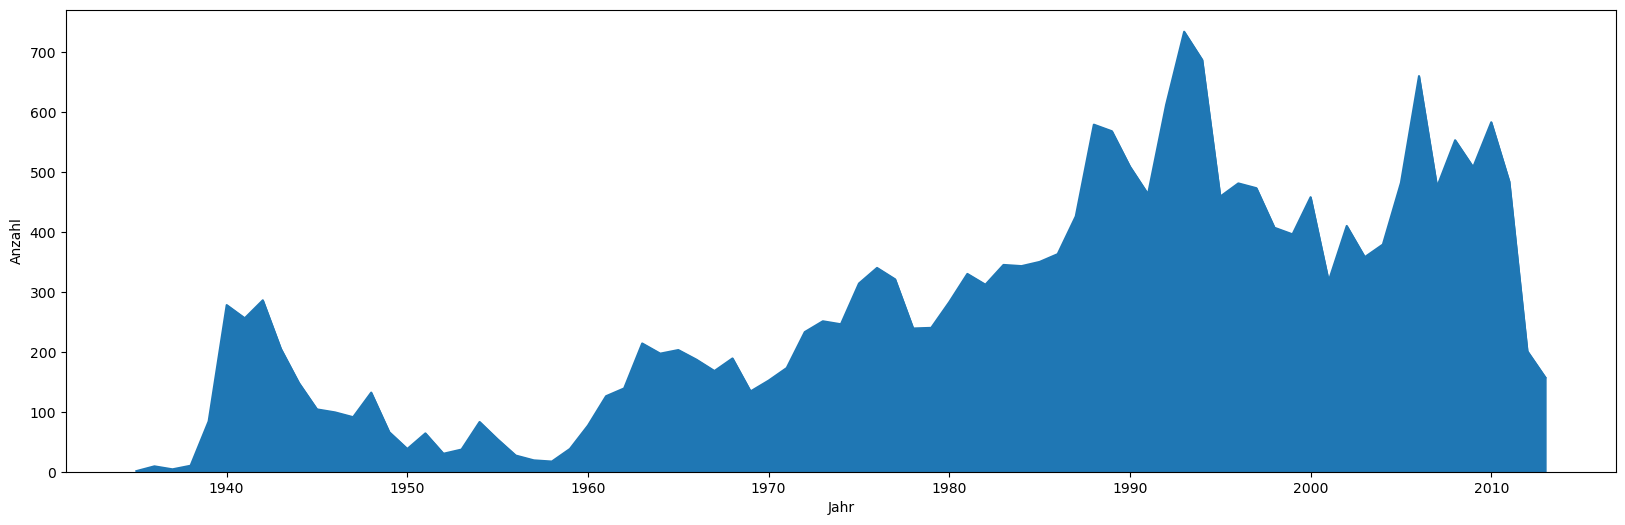

In [39]:
plt.figure(figsize=(20, 6))
marvel_data_1.groupby(['year']).size().plot(kind='area')
dc_data_1.groupby(['year']).size().plot(kind='area')
plt.ylabel("Anzahl")
plt.xlabel("Jahr")
plt.show()

plt.figure(figsize=(20, 6))
data_1.groupby(['year']).size().plot(kind='area')
plt.ylabel("Anzahl")
plt.xlabel("Jahr")
plt.show()

### Compare the same for only "male" and "female" superheros. 

In [132]:
# Windowsgröße für das Rolling average 
windowsize = 5

#### Marvel

In [133]:
marvel_male_mask = (marvel_data_1['sex'] =='male characters')
marvel_female_mask = (marvel_data_1['sex'] =='female characters')
marvel_male_female_mask = (marvel_female_mask | marvel_male_mask)

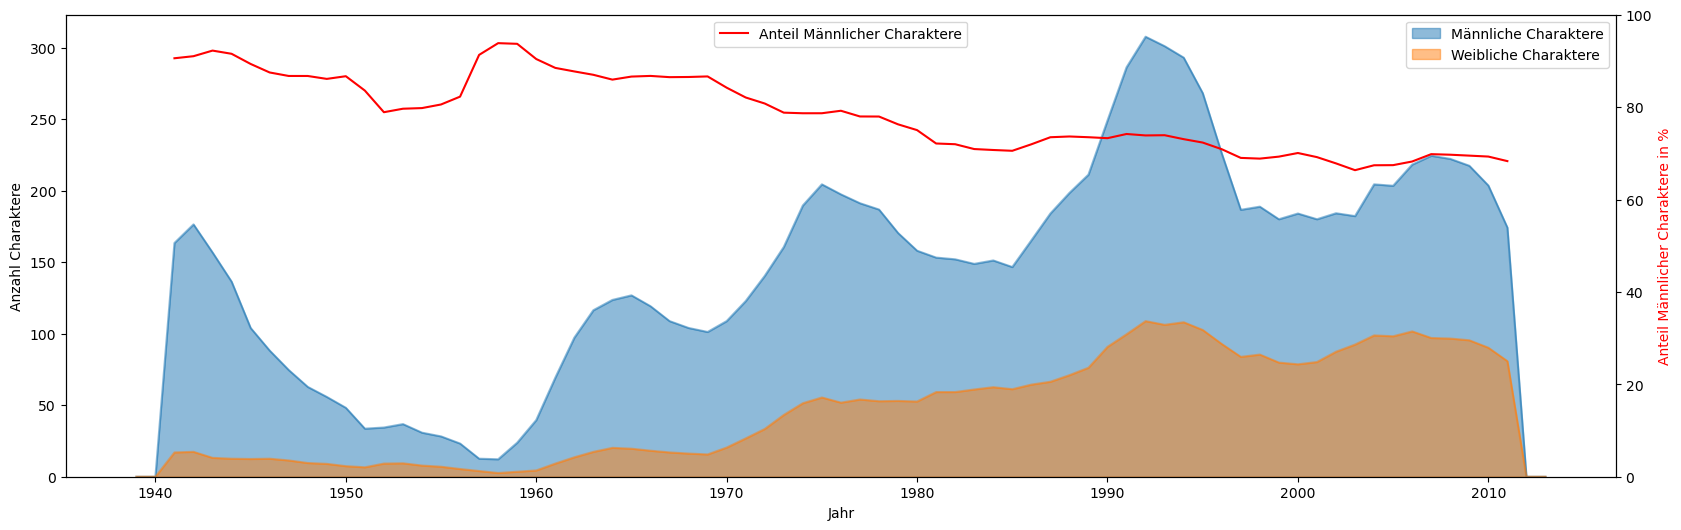

In [137]:
fig, ax1 = plt.subplots(figsize=(20, 6))

# datenverarbeitung
marvel_male = marvel_data_1[marvel_male_mask].groupby(['year']).size().rolling(window=windowsize, center=True).mean()
marvel_female = marvel_data_1[marvel_female_mask].groupby(['year']).size().rolling(window=windowsize, center=True).mean()
marvel_male_female = marvel_data_1[marvel_male_female_mask].groupby(['year']).size().rolling(window=windowsize, center=True).mean()

marvel_male.plot(kind='area', alpha=0.5, label='Männliche Charaktere', ax=ax1)
marvel_female.plot(kind='area', alpha=0.5, label='Weibliche Charaktere', ax=ax1)

# Achse Links
ax1.set_ylabel('Anzahl Charaktere')
ax1.legend(loc='best')
ax1.set_xlabel('Jahr')

# Achse Rechts
ax2 = ax1.twinx()
marvel_share_male = (marvel_male / marvel_male_female)*100
marvel_share_male.plot(kind='line', color='red', label='Anteil Männlicher Charaktere', ax=ax2)

ax2.set_ylabel('Anteil Männlicher Charaktere in %')
ax2.set_ylim(0, 100)
ax2.legend(loc='upper center')
ax2.yaxis.label.set_color('red')

plt.show()

#### Dc

In [135]:
dc_male_mask = (dc_data_1['sex'] =='male characters')
dc_female_mask = (dc_data_1['sex'] =='female characters')
dc_male_female_mask = (dc_female_mask | dc_male_mask)

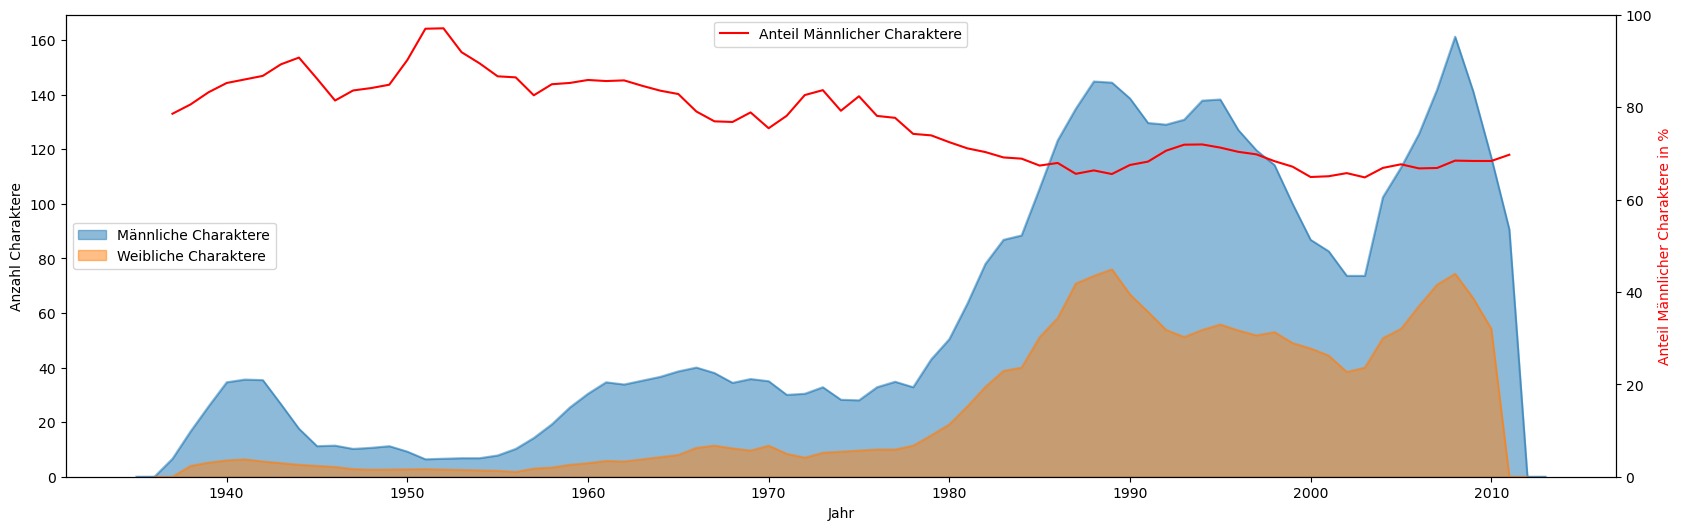

In [138]:
fig, ax1 = plt.subplots(figsize=(20, 6))

# datenverarbeitung
dc_male = dc_data_1[dc_male_mask].groupby(['year']).size().rolling(window=windowsize, center=True).mean()
dc_female = dc_data_1[dc_female_mask].groupby(['year']).size().rolling(window=windowsize, center=True).mean()
dc_male_female = dc_data_1[dc_male_female_mask].groupby(['year']).size().rolling(window=windowsize, center=True).mean()

dc_male.plot(kind='area', alpha=0.5, label='Männliche Charaktere', ax=ax1)
dc_female.plot(kind='area', alpha=0.5, label='Weibliche Charaktere', ax=ax1)

# Achse Links
ax1.set_ylabel("Anzahl Charaktere")
ax1.legend(loc='center left')
ax1.set_xlabel("Jahr")

# Achse Rechts
ax2 = ax1.twinx()
dc_share_male = (dc_male / dc_male_female)*100
dc_share_male.plot(kind='line', color='red', label='Anteil Männlicher Charaktere', ax=ax2)

ax2.set_ylabel('Anteil Männlicher Charaktere in %')
ax2.legend(loc='upper center')
ax2.set_ylim(0,100)
ax2.yaxis.label.set_color('red')

plt.show()

#### Marvel & Dc Zusammen

In [122]:
male_mask = (data_1['sex'] =='male characters')
female_mask = (data_1['sex'] =='female characters')
male_female_mask = (female_mask | male_mask)

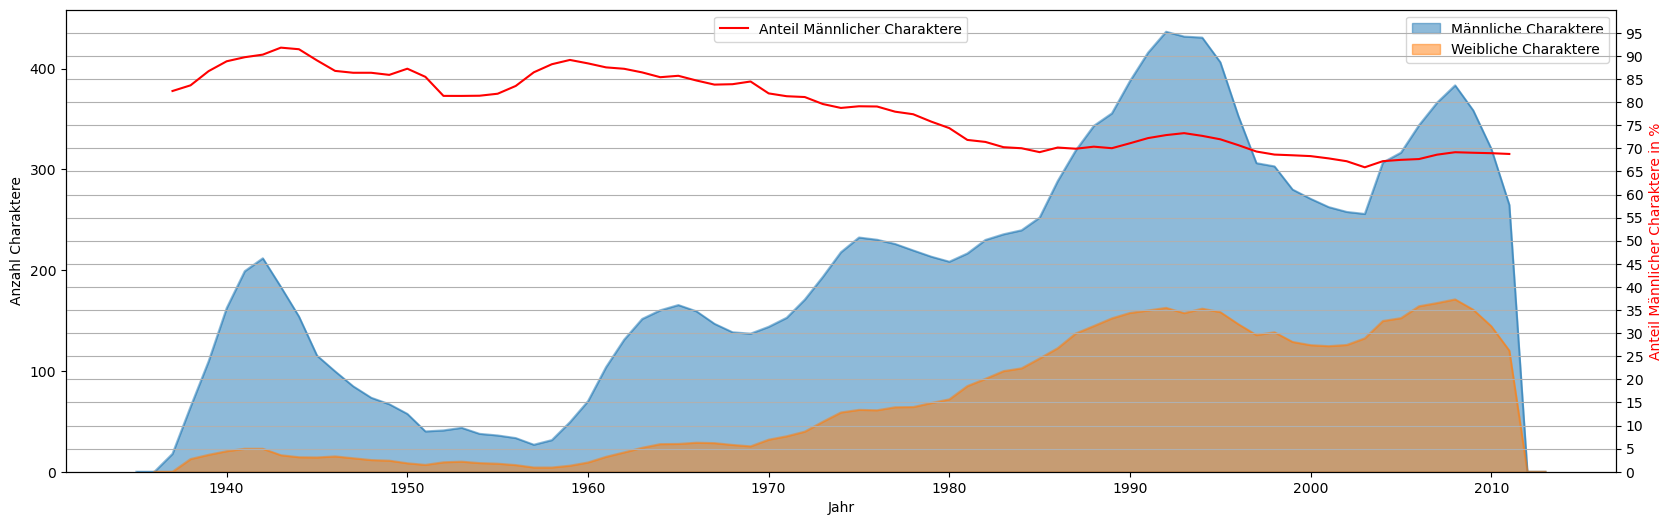

In [161]:
fig, ax1 = plt.subplots(figsize=(20, 6))

# datenverarbeitung
male = data_1[male_mask].groupby(['year']).size().rolling(window=windowsize, center=True).mean()
female = data_1[female_mask].groupby(['year']).size().rolling(window=windowsize, center=True).mean()
male_female = data_1[male_female_mask].groupby(['year']).size().rolling(window=windowsize, center=True).mean()

male.plot(kind='area', alpha=0.5, label='Männliche Charaktere', ax=ax1)
female.plot(kind='area', alpha=0.5, label='Weibliche Charaktere', ax=ax1)

# Achse Links
ax1.set_ylabel("Anzahl Charaktere")
ax1.legend(loc='best')
ax1.set_xlabel("Jahr")

# Achse Rechts
ax2 = ax1.twinx()
share_male = (male / male_female)*100
share_male.plot(kind='line', color='red', label='Anteil Männlicher Charaktere', ax=ax2)

ax2.set_ylabel('Anteil Männlicher Charaktere in %')
ax2.set_ylim(0, 100)
ax2.grid()
ax2.set_yticks(np.arange(0, 100, step=5))
ax2.legend(loc='upper center')
ax2.yaxis.label.set_color('red')

plt.show()

#### Marvel vs DC

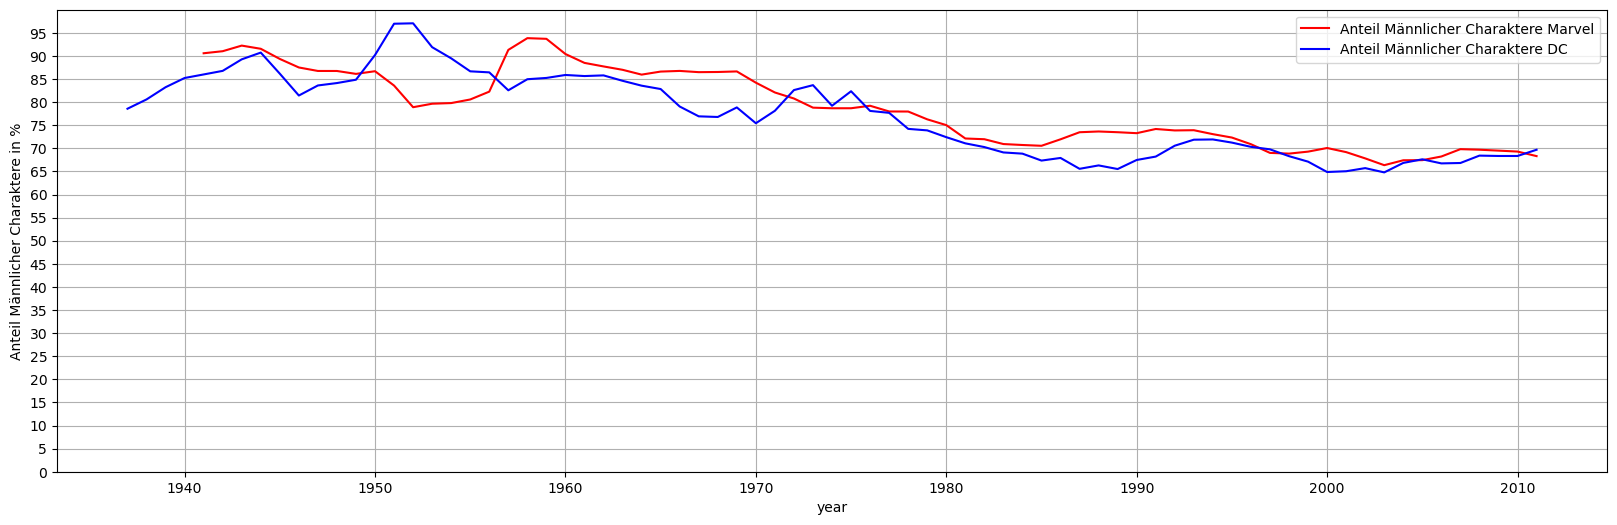

In [158]:
plt.figure(figsize=(20, 6))
marvel_share_male.plot(kind='line', color='red', label='Anteil Männlicher Charaktere Marvel')
dc_share_male.plot(kind='line', color='Blue', label='Anteil Männlicher Charaktere DC')
plt.ylim(0, 100)
plt.ylabel('Anteil Männlicher Charaktere in %')
plt.grid()
plt.yticks(np.arange(0, 100, step=5))
plt.legend()

#### Antwort:

1. How is the male-to-female ratio of superheros (marvel + DC) and how does it change over time?

In [131]:
print(f'Die male-to-female ratio alle superhelden(Marvel + Dc): {len(data_1[male_mask])/len(data_1[female_mask])}')

Die male-to-female ratio alle superhelden(Marvel + Dc): 2.840358744394619


Die male-to-female ratio ist im ersten Jahrzehnt am höchsten (~5,6). Über die Folgenden jahrzehne sinkt diese bis in die 1980er stetig und landet bei ~2,3. Dies bleit so bis zum Ende des Datensatzes.


2. How does this compare between Marvel and DC superheros?

Die unterschiede zwischen den Ratios sind allgemein Klein und änlich. DC hatte den größten Vorsprung von 1965 bis 1970 und 1985 bis 1993 mit einem ~8% größeren Frauenanteil. Gegen ende des Datensatzes gibt es Bei beiden ~2,3 mal mehr Männliche Superhelden als Weibliche.

## Data analysis 2 
Here you should address the two main questions posed at the beginning:

3. How does the look (hair color, eyes ...) change over time?
4. Is there a typical look of a bad superhero and a good superhero?

### Exercise 5:
- Find suitable plots to show if/how superhero hair color and eye color changed over time.
- Answer question no. 4 using visualization as well as a correlation analysis.

#### Find suitable plots to show if/how superhero hair color and eye color changed over time.

In [247]:
data_2 = pd.concat([marvel_data_2,dc_data_2])

In [260]:
top_x = 6 
top_hair_colors = data_2['hair'].value_counts().nlargest(top_x).index

In [261]:
data_2['hair_simplified'] = data_2['hair'].apply(lambda x: x if x in top_hair_colors else 'Other')

<Axes: xlabel='Jahr', ylabel='Haarfarbenanteile'>

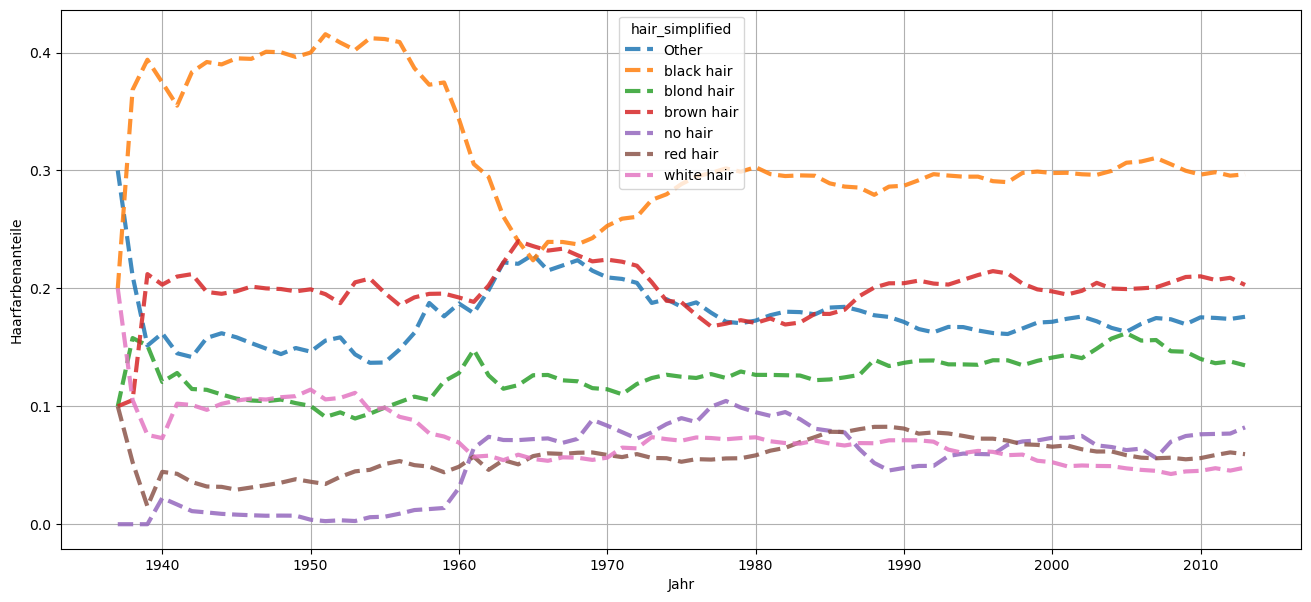

In [ ]:
hair_counts = data_2.groupby(['year', 'hair_simplified']).size().unstack(fill_value=0)
hair_counts_rolling = hair_counts.rolling(window=10, min_periods=3).mean()
hair_counts_norm = hair_counts_rolling.div(hair_counts_rolling.sum(axis=1), axis=0)

hair_counts_norm.plot(kind='line', linewidth=3, alpha=0.85, figsize=(16,7), grid=0.2, ylabel= 'Haarfarbenanteile', xlabel= 'Jahr', style='--')


In [293]:
top_x = 10
top_eye_colors = data_2['eye'].value_counts().nlargest(top_x).index

data_2['eye_simplified'] = data_2['eye'].apply(lambda x: x if x in top_eye_colors else 'Other')

<Axes: xlabel='Jahr', ylabel='Augen Anteile'>

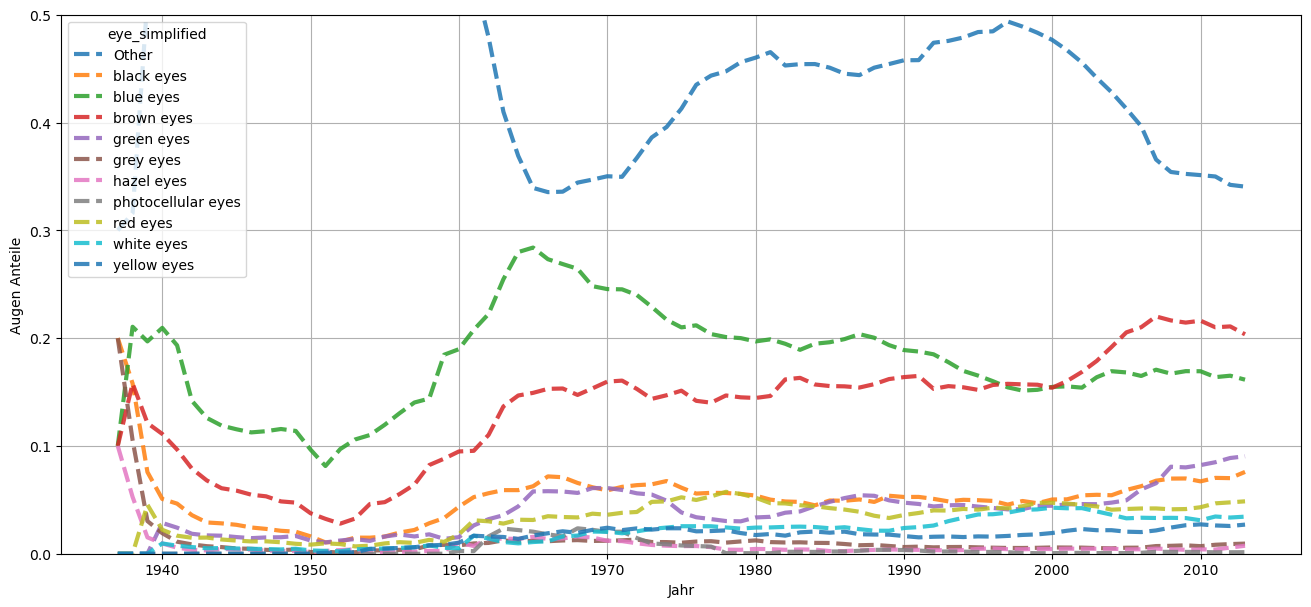

In [306]:
eye_counts = data_2.groupby(['year', 'eye_simplified']).size().unstack(fill_value=0)
eye_counts_rolling = eye_counts.rolling(window=10, min_periods=3).mean()
eye_counts_norm = eye_counts_rolling.div(eye_counts_rolling.sum(axis=1), axis=0)

eye_counts_norm.plot(kind='line', linewidth=3, alpha=0.85, figsize=(16,7), grid=0.2, ylabel= 'Augen Anteile', xlabel= 'Jahr', style='--',ylim=(0,0.5))

#### 3. How does the look (hair color, eyes ...) change over time?

Von Anfang an waren Schwarze Haare am Häufigsten. Zwischenzeitlich wurden sie sehr kurz von Braunen haaren übernommen. Schwarze Haare machten von 1940 bis 1960 40% der Haarfarben aus und sanken danach auf 30% herab. Braune Haare blieben durchweg bei ~20%. Über die ganze Zeitspanne wächst der Anteil an Blonden Haaren liecht von ~10 auf ~15. Keine Haare bekam 1960 einen 5% sprung auf ~9%. 

Die verschiedenen Augen sind stärker fragmentiert als die Haare, wobei die 10 Häufigsten Augen 1950 zusammen nicht über 20% Anteil kommen. Blaue und Braune Augen sind am Häufigsten vertreten. Blaue Augen waren vor 1990 häufiger als Braune, wurden dann jedoch überholt. Der höhepunkt an neuen charackteren mit Blauen augen war ~ 1960, mit einem fast 30% Anteil. Braune Augen lagen zu diesen Zeitpunkt bei ~ 15%.

### Answer question no. 4 using visualization as well as a correlation analysis.

In [311]:
data_3 = pd.concat([marvel_data_3,dc_data_3])

In [318]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7939 entries, 0 to 6895
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   align             7939 non-null   object 
 1   alive             7939 non-null   object 
 2   appearances       7596 non-null   float64
 3   eye               7939 non-null   object 
 4   first appearance  7583 non-null   object 
 5   gsm               110 non-null    object 
 6   hair              7939 non-null   object 
 7   id                7102 non-null   object 
 8   name              7939 non-null   object 
 9   page_id           7939 non-null   int64  
 10  sex               7939 non-null   object 
 11  urlslug           7939 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 806.3+ KB


In [328]:
good_mask = (data_3['align'] == 'good characters')
bad_mask = (data_3['align'] == 'bad characters')

In [337]:
data_3.value_counts(subset=['eye','hair']).head(3) /len(data_3) * 100

eye         hair      
brown eyes  black hair    13.994206
blue eyes   blond hair    11.134904
brown eyes  brown hair    10.945963
Name: count, dtype: float64

In [333]:
(data_3[good_mask].value_counts(subset=['eye','hair'])/len(data_3[good_mask])).head(3) * 100

eye         hair      
brown eyes  black hair    16.878246
blue eyes   blond hair    14.368148
brown eyes  brown hair    12.406232
Name: count, dtype: float64

In [336]:
data_3[bad_mask].value_counts(subset=['eye','hair']).head(3) /len(data_3[bad_mask]) * 100

eye         hair      
brown eyes  black hair    11.563773
            brown hair     9.495456
blue eyes   blond hair     8.179254
Name: count, dtype: float64

In [338]:
data_3['hair_eye_combo'] = data_3['hair'].astype(str) + ', ' + data_3['eye'].astype(str)

In [343]:
data_3.hair_eye_combo.value_counts().nlargest(10)

hair_eye_combo
black hair, brown eyes    1111
blond hair, blue eyes      884
brown hair, brown eyes     869
black hair, blue eyes      591
brown hair, blue eyes      408
black hair, black eyes     361
red hair, blue eyes        208
white hair, blue eyes      205
red hair, green eyes       177
no hair, green eyes        140
Name: count, dtype: int64

In [352]:
combo_dummies = pd.get_dummies(data_3[good_mask | bad_mask]['hair_eye_combo'], prefix='combo')
align_dummies = pd.get_dummies(data_3[good_mask | bad_mask]['align'], prefix='align')

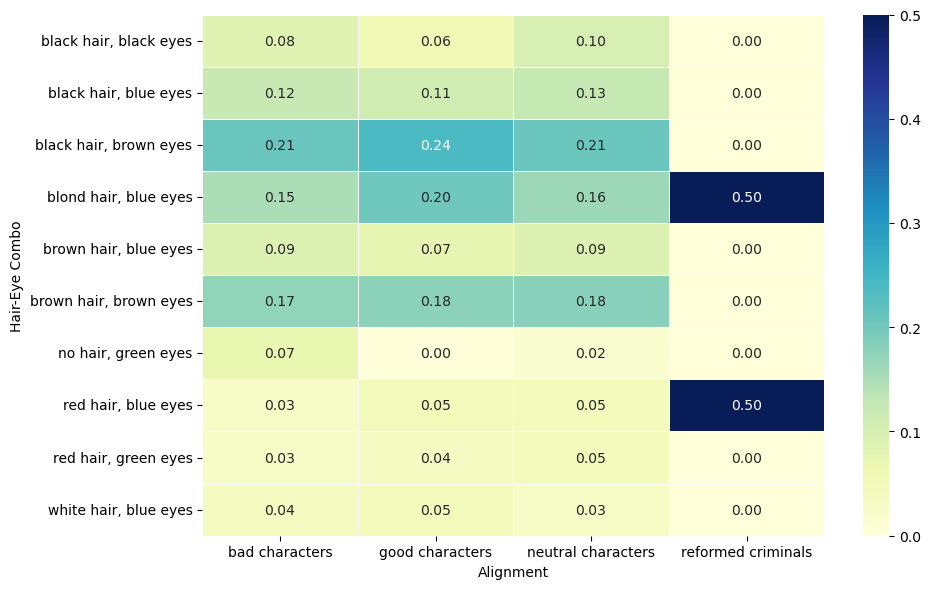

In [366]:
top_combos = data_3['hair_eye_combo'].value_counts().nlargest(10).index
df_top = data_3[data_3['hair_eye_combo'].isin(top_combos)]

cross_norm = pd.crosstab(df_top['hair_eye_combo'], df_top['align'], normalize='columns')

plt.figure(figsize=(10, 6))
sns.heatmap(cross_norm, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

plt.xlabel("Alignment")
plt.ylabel("Hair-Eye Combo")
plt.tight_layout()

### 4. Is there a typical look of a bad superhero and a good superhero?

Ein typischer guter Held wäre wahrscheinlich schwarzhaarig und braunaugig.